In [4]:
#Uso e importación de la libreria Pandas para Python
import pandas as pd
#Uso e importación de la libreria Numpy para Python
import numpy as np
#Uso e importación de la libreria Matplotlib para Python
import matplotlib.pyplot as plt
#Uso e importación de la libreria Seaborn para Python
import seaborn as sns


In [5]:
# Leer el dataset
df = pd.read_csv("dataset_siniestros_2022.csv", sep=",")
df


,MES,NEGATIVO,SOLO DAÑOS,CHOQUE CON LESIONADOS,FALSA ALARMA,POR ATROPELLO,INSPECCION A CADAVER,POR VOLCAMIENTO,POR CAIDA DE OCUPANTE,MUERTE EN LA VÍA,TOTAL
0,ENERO,1491,513,292,3,39,19,16,11,4,2388
1,FEBRERO,1757,544,307,1,44,15,12,16,2,2698
2,MARZO,2042,638,358,1,35,13,14,18,2,3121
3,ABRIL,1752,502,319,1,39,15,11,12,6,2657
4,MAYO,1959,532,324,5,50,26,15,14,8,2933
5,JUNIO,1822,533,309,1,48,21,6,17,5,2762
6,JULIO,1886,484,328,0,47,24,14,17,7,2807
7,AGOSTO,1868,438,329,2,37,19,7,23,7,2730
8,SEPTIEMBRE,1944,437,316,6,47,17,17,18,10,2812
9,OCTUBRE,1586,159,321,3,38,15,16,12,12,2162


In [6]:
# Explorar los datos
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   MES                    13 non-null     object
 1   NEGATIVO               13 non-null     int64 
 2   SOLO DAÑOS             13 non-null     int64 
 3   CHOQUE CON LESIONADOS  13 non-null     int64 
 4   FALSA ALARMA           13 non-null     int64 
 5   POR ATROPELLO          13 non-null     int64 
 6   INSPECCION A CADAVER   13 non-null     int64 
 7   POR VOLCAMIENTO        13 non-null     int64 
 8   POR CAIDA DE OCUPANTE  13 non-null     int64 
 9   MUERTE EN LA VÍA       13 non-null     int64 
 10  TOTAL                  13 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.2+ KB


In [17]:
# Eliminar la fila "TOTAL"
df = df[df["MES"] != "TOTAL"]
df

,MES,NEGATIVO,SOLO DAÑOS,CHOQUE CON LESIONADOS,FALSA ALARMA,POR ATROPELLO,INSPECCION A CADAVER,POR VOLCAMIENTO,POR CAIDA DE OCUPANTE,MUERTE EN LA VÍA,TOTAL
0,ENERO,1491,513,292,3,39,19,16,11,4,2388
1,FEBRERO,1757,544,307,1,44,15,12,16,2,2698
2,MARZO,2042,638,358,1,35,13,14,18,2,3121
3,ABRIL,1752,502,319,1,39,15,11,12,6,2657
4,MAYO,1959,532,324,5,50,26,15,14,8,2933
5,JUNIO,1822,533,309,1,48,21,6,17,5,2762
6,JULIO,1886,484,328,0,47,24,14,17,7,2807
7,AGOSTO,1868,438,329,2,37,19,7,23,7,2730
8,SEPTIEMBRE,1944,437,316,6,47,17,17,18,10,2812
9,OCTUBRE,1586,159,321,3,38,15,16,12,12,2162


In [21]:
# Calcular el total de accidentes por mes
total_por_mes = df.groupby("MES")["TOTAL"].sum()
print(total_por_mes)


MES
ABRIL         2657
AGOSTO        2730
DICIEMBRE     2043
ENERO         2388
FEBRERO       2698
JULIO         2807
JUNIO         2762
MARZO         3121
MAYO          2933
NOVIEMBRE     2023
OCTUBRE       2162
SEPTIEMBRE    2812
Name: TOTAL, dtype: int64


In [22]:
umbral = 2500
meses_con_mas_accidentes = df[df["TOTAL"] > umbral]
print(meses_con_mas_accidentes)


          MES  NEGATIVO  SOLO DAÑOS  CHOQUE CON LESIONADOS  FALSA ALARMA  \
1     FEBRERO      1757         544                    307             1   
2       MARZO      2042         638                    358             1   
3       ABRIL      1752         502                    319             1   
4        MAYO      1959         532                    324             5   
5       JUNIO      1822         533                    309             1   
6       JULIO      1886         484                    328             0   
7      AGOSTO      1868         438                    329             2   
8  SEPTIEMBRE      1944         437                    316             6   

   POR ATROPELLO  INSPECCION A CADAVER  POR VOLCAMIENTO  \
1             44                    15               12   
2             35                    13               14   
3             39                    15               11   
4             50                    26               15   
5             48    

In [23]:
# Calcular la proporción de "NEGATIVO" en cada mes
df["PROP_NEGATIVO"] = df["NEGATIVO"] / df["TOTAL"]
print(df[["MES", "PROP_NEGATIVO"]])


           MES  PROP_NEGATIVO
0        ENERO       0.624372
1      FEBRERO       0.651223
2        MARZO       0.654277
3        ABRIL       0.659390
4         MAYO       0.667917
5        JUNIO       0.659667
6        JULIO       0.671892
7       AGOSTO       0.684249
8   SEPTIEMBRE       0.691323
9      OCTUBRE       0.733580
10   NOVIEMBRE       0.760257
11   DICIEMBRE       0.773372


In [24]:
# Agregar una nueva columna para el promedio de accidentes por día
df["PROMEDIO_POR_DIA"] = df["TOTAL"] / 30  # Suponiendo 30 días en un mes
print(df[["MES", "PROMEDIO_POR_DIA"]])


           MES  PROMEDIO_POR_DIA
0        ENERO         79.600000
1      FEBRERO         89.933333
2        MARZO        104.033333
3        ABRIL         88.566667
4         MAYO         97.766667
5        JUNIO         92.066667
6        JULIO         93.566667
7       AGOSTO         91.000000
8   SEPTIEMBRE         93.733333
9      OCTUBRE         72.066667
10   NOVIEMBRE         67.433333
11   DICIEMBRE         68.100000


In [25]:
# Ordenar el DataFrame por el número total de accidentes en orden descendente
df_sorted = df.sort_values(by="TOTAL", ascending=False)
print(df_sorted)


           MES  NEGATIVO  SOLO DAÑOS  CHOQUE CON LESIONADOS  FALSA ALARMA  \
2        MARZO      2042         638                    358             1   
4         MAYO      1959         532                    324             5   
8   SEPTIEMBRE      1944         437                    316             6   
6        JULIO      1886         484                    328             0   
5        JUNIO      1822         533                    309             1   
7       AGOSTO      1868         438                    329             2   
1      FEBRERO      1757         544                    307             1   
3        ABRIL      1752         502                    319             1   
0        ENERO      1491         513                    292             3   
9      OCTUBRE      1586         159                    321             3   
11   DICIEMBRE      1580          88                    338             5   
10   NOVIEMBRE      1538         109                    357             3   

In [26]:
categoria_especifica = "MUERTE EN LA VÍA"
sin_accidentes = df[df[categoria_especifica] == 0]
print(sin_accidentes)


Empty DataFrame
Columns: [MES, NEGATIVO, SOLO DAÑOS, CHOQUE CON LESIONADOS, FALSA ALARMA, POR ATROPELLO, INSPECCION A CADAVER, POR VOLCAMIENTO, POR CAIDA DE OCUPANTE, MUERTE EN LA VÍA, TOTAL, PROP_NEGATIVO, PROMEDIO_POR_DIA]
Index: []


In [27]:
categoria_interes = "NEGATIVO"
resumen_estadistico = df[categoria_interes].describe()
print(resumen_estadistico)


count      12.000000
mean     1768.750000
std       182.866133
min      1491.000000
25%      1584.500000
50%      1789.500000
75%      1900.500000
max      2042.000000
Name: NEGATIVO, dtype: float64


In [28]:
columna_con_nulos = "POR VOLCAMIENTO"
filas_con_nulos = df[df[columna_con_nulos].isnull()]
conteo_nulos = filas_con_nulos.shape[0]
print("Cantidad de filas con nulos en la columna {}: {}".format(columna_con_nulos, conteo_nulos))


Cantidad de filas con nulos en la columna POR VOLCAMIENTO: 0


In [29]:
columnas_de_interes = ["MES", "NEGATIVO", "SOLO DAÑOS", "TOTAL"]
df_subconjunto = df[columnas_de_interes]
print(df_subconjunto)


           MES  NEGATIVO  SOLO DAÑOS  TOTAL
0        ENERO      1491         513   2388
1      FEBRERO      1757         544   2698
2        MARZO      2042         638   3121
3        ABRIL      1752         502   2657
4         MAYO      1959         532   2933
5        JUNIO      1822         533   2762
6        JULIO      1886         484   2807
7       AGOSTO      1868         438   2730
8   SEPTIEMBRE      1944         437   2812
9      OCTUBRE      1586         159   2162
10   NOVIEMBRE      1538         109   2023
11   DICIEMBRE      1580          88   2043


In [30]:
df["TOTAL_FORMATO"] = df["TOTAL"].apply(lambda x: "{:,}".format(x))
print(df[["MES", "TOTAL_FORMATO"]])


           MES TOTAL_FORMATO
0        ENERO         2,388
1      FEBRERO         2,698
2        MARZO         3,121
3        ABRIL         2,657
4         MAYO         2,933
5        JUNIO         2,762
6        JULIO         2,807
7       AGOSTO         2,730
8   SEPTIEMBRE         2,812
9      OCTUBRE         2,162
10   NOVIEMBRE         2,023
11   DICIEMBRE         2,043


In [31]:
matriz_correlacion = df.corr()
print(matriz_correlacion)


                       NEGATIVO  SOLO DAÑOS  CHOQUE CON LESIONADOS  \
NEGATIVO               1.000000    0.673032               0.193348   
SOLO DAÑOS             0.673032    1.000000              -0.343854   
CHOQUE CON LESIONADOS  0.193348   -0.343854               1.000000   
FALSA ALARMA          -0.133586   -0.429231              -0.006909   
POR ATROPELLO          0.580882    0.784743              -0.598989   
INSPECCION A CADAVER   0.377487    0.402221              -0.458058   
POR VOLCAMIENTO        0.379694    0.571298              -0.454498   
POR CAIDA DE OCUPANTE  0.732381    0.761625              -0.307112   
MUERTE EN LA VÍA      -0.340665   -0.836343               0.214484   
TOTAL                  0.923066    0.904670              -0.073317   
PROP_NEGATIVO         -0.417872   -0.945765               0.554550   
PROMEDIO_POR_DIA       0.923066    0.904670              -0.073317   

                       FALSA ALARMA  POR ATROPELLO  INSPECCION A CADAVER  \
NEGATIVO     

C:\Users\Juan Hurtado\AppData\Local\Temp\ipykernel_38632\3296157106.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df.corr()


In [32]:
df_filtrado = df[(df["NEGATIVO"] > 1000) & (df["SOLO DAÑOS"] > 200)]
print(df_filtrado)


          MES  NEGATIVO  SOLO DAÑOS  CHOQUE CON LESIONADOS  FALSA ALARMA  \
0       ENERO      1491         513                    292             3   
1     FEBRERO      1757         544                    307             1   
2       MARZO      2042         638                    358             1   
3       ABRIL      1752         502                    319             1   
4        MAYO      1959         532                    324             5   
5       JUNIO      1822         533                    309             1   
6       JULIO      1886         484                    328             0   
7      AGOSTO      1868         438                    329             2   
8  SEPTIEMBRE      1944         437                    316             6   

   POR ATROPELLO  INSPECCION A CADAVER  POR VOLCAMIENTO  \
0             39                    19               16   
1             44                    15               12   
2             35                    13               14   
3  

In [33]:
df["AÑO"] = df["MES"].str[-4:]
resumen_por_año = df.groupby("AÑO")["TOTAL"].sum()
print(resumen_por_año)


AÑO
ARZO    3121
BRIL    2657
MAYO    2933
MBRE    6878
NERO    2388
OSTO    2730
RERO    2698
UBRE    2162
ULIO    2807
UNIO    2762
Name: TOTAL, dtype: int64


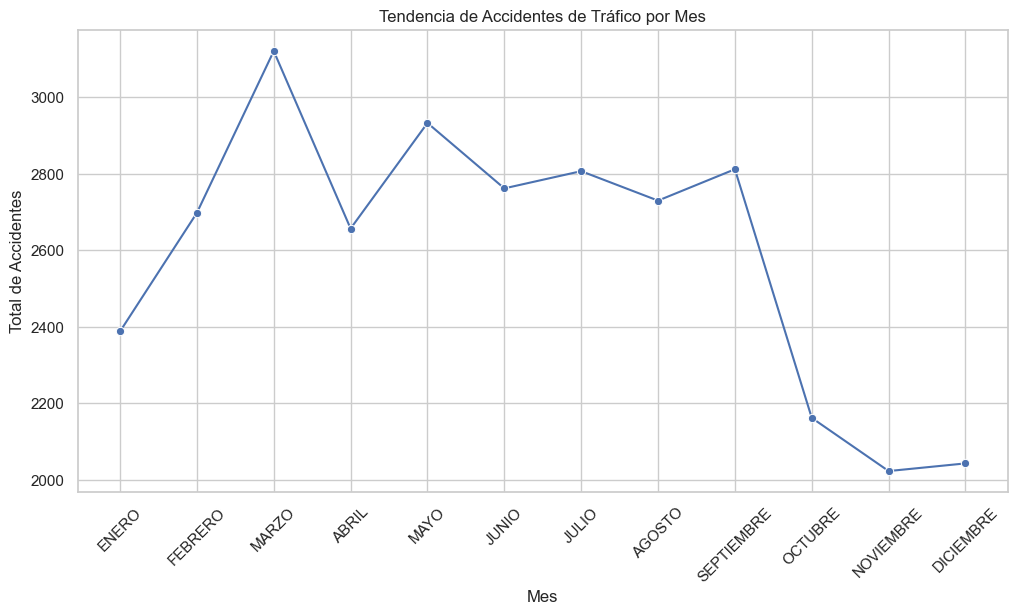

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="MES", y="TOTAL", data=df, marker="o", color="b")
plt.title("Tendencia de Accidentes de Tráfico por Mes")
plt.xlabel("Mes")
plt.ylabel("Total de Accidentes")
plt.xticks(rotation=45)
plt.show()


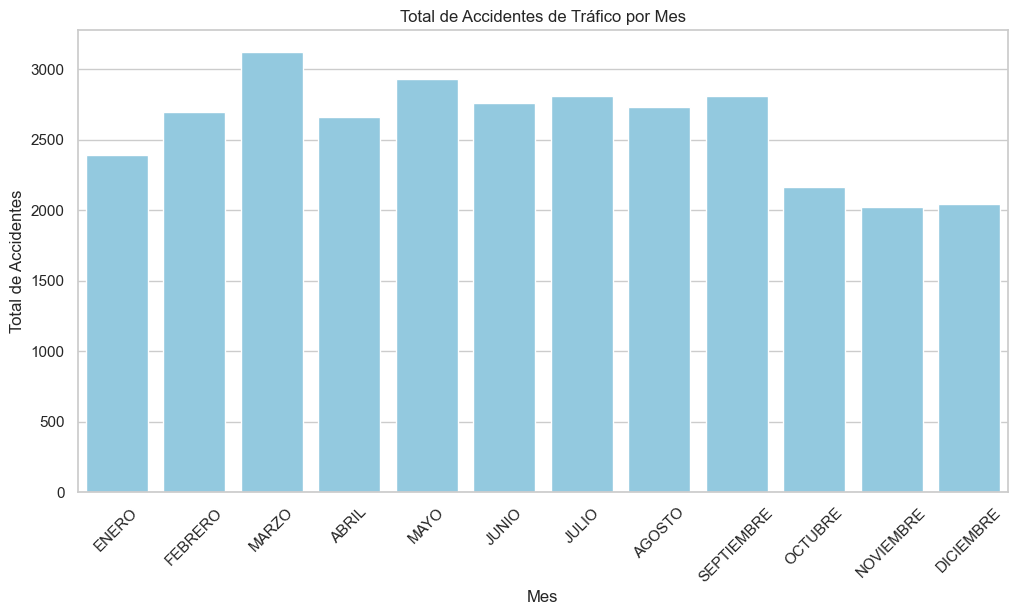

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x="MES", y="TOTAL", data=df, color="skyblue")
plt.title("Total de Accidentes de Tráfico por Mes")
plt.xlabel("Mes")
plt.ylabel("Total de Accidentes")
plt.xticks(rotation=45)
plt.show()


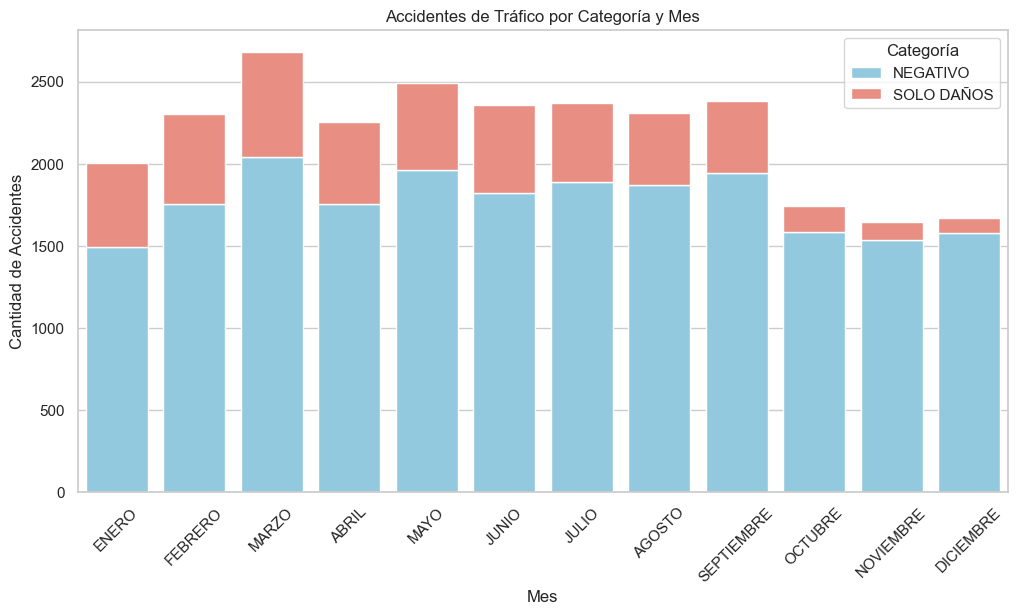

In [39]:
# Crear un nuevo DataFrame que contenga solo algunas columnas de interés
columnas_de_interes = ["MES", "NEGATIVO", "SOLO DAÑOS", "TOTAL"]
df_subconjunto = df[columnas_de_interes]

# Configurar el estilo de Seaborn
sns.set_style("whitegrid")

# Crear un gráfico de barras apiladas por mes para las categorías "NEGATIVO" y "SOLO DAÑOS"
plt.figure(figsize=(12, 6))
sns.barplot(x="MES", y="NEGATIVO", data=df_subconjunto, label="NEGATIVO", color="skyblue")
sns.barplot(x="MES", y="SOLO DAÑOS", data=df_subconjunto, bottom=df_subconjunto["NEGATIVO"], label="SOLO DAÑOS", color="salmon")

plt.title("Accidentes de Tráfico por Categoría y Mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Accidentes")
plt.legend(loc="upper right", title="Categoría")
plt.xticks(rotation=45)
plt.show()



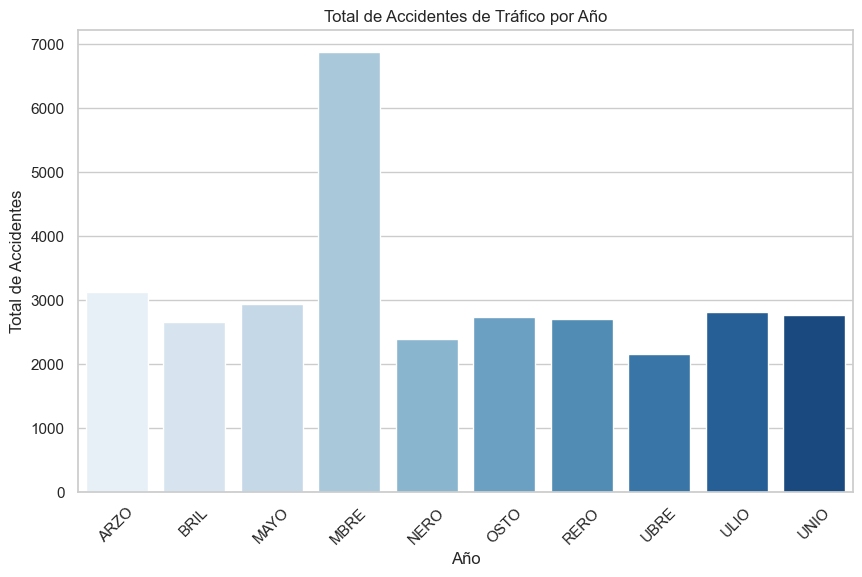

In [40]:
# Crear una nueva columna que extraiga el año a partir del mes
df["AÑO"] = df["MES"].str[-4:]

# Resumir los datos por año
resumen_por_año = df.groupby("AÑO")["TOTAL"].sum().reset_index()

# Configurar el estilo de Seaborn
sns.set_style("whitegrid")

# Crear un gráfico de barras para visualizar el total de accidentes por año
plt.figure(figsize=(10, 6))
sns.barplot(x="AÑO", y="TOTAL", data=resumen_por_año, palette="Blues")
plt.title("Total de Accidentes de Tráfico por Año")
plt.xlabel("Año")
plt.ylabel("Total de Accidentes")
plt.xticks(rotation=45)
plt.show()